# Assosication rules

In [111]:
import numpy as np
import pandas as pd
import mlxtend
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

## Task
The store manager has asked for your assistance with the following business problems.

- **Task 1a:** The store plans to run a promotion on pizza cheese and the price reduction is expected to lead to a 300% increase in sales of pizza cheese. To keep up with demand, the store manager has notified the supply chain of the expected increase in sales of pizza cheese. 
- **Task 1b:** Should the store manager also alert the supply chain of a potential increase in demand of any other items?


- **Task 2:** Taco Shells is one of Axstore’s most popular articles, but unfortunately, the vendor is out of stock and cannot make any more deliveries of that article for the coming weeks. Can the store manager order more of some other article to compensate for the loss of taco shells? That is to say, do we have reason to believe that the sales of taco shells will be transferred to some other articles in the assortment? The problems can be treated separately since Axstore’s current stock of taco shells is expected to last beyond the end date of the promotion on pizza cheese. 


The data is stored in the file ‘Axstore.csv’ and has the following columns. 
- Sales_Tran_Seq_Num: A sequence number that identifies a certain transaction. 
- Member_Account_Seq_Num: A sequence number that identifies the member that made the transaction. 
- Article_Seq_Num: A sequence number that identifies a certain article belonging to the transaction.

Note that each article appears at most once on a receipt and that the sold quantity of each item has been removed from the data set since that information is not relevant for this case

## Data preparation

In [112]:
df=pd.read_csv("Axstore.csv")

In [113]:
df['Article_Desc'] = df['Article_Desc'].str.lower().str.replace(' ', '_')
df.sort_values(by=['Sales_Tran_Seq_Num', 'Member_Account_Seq_Num', 'Article_Seq_Num']).head(10)

,Sales_Tran_Seq_Num,Member_Account_Seq_Num,Article_Seq_Num,Article_Desc
0,0,51,0,banana
1,0,51,16,apple
2,1,36,0,banana
4,1,36,5,pineapple
5,1,36,10,ham
6,1,36,13,pizza_cheese
7,1,36,15,mozarella
3,1,36,16,apple
8,1,36,23,croutons
9,1,36,24,lettuce


In [4]:
df.shape

(32742, 4)

In [23]:
df.Sales_Tran_Seq_Num.unique().shape

(9151,)

In [25]:
df.Article_Desc.unique()

array(['banana', 'apple', 'pineapple', 'ham', 'pizza_cheese', 'mozarella',
       'croutons', 'lettuce', 'chicken', 'olives', 'prosciutto',
       'parmesan', 'pizza_kit', 'mushroom', 'squid', 'crab_stick',
       'ruccola', 'entrecote', 'feta', 'onion', 'corn', 'taco_spice_mix',
       'taco_shell', 'taco_salsa', 'minced_meat', 'tomato', 'shrimp',
       'taco_tortilla', 'penne', 'taco_tubs'], dtype=object)

## Data exploration

In [87]:
df_plot=df
df_plot["count"]=1
df_plot2=df_plot[["Article_Desc","count"]].groupby("Article_Desc").sum().reset_index().sort_values(by="count",ascending=False)
df_plot2.head()

,Article_Desc,count
1,banana,7813
19,pizza_kit,1698
13,olives,1408
0,apple,1372
8,ham,1211


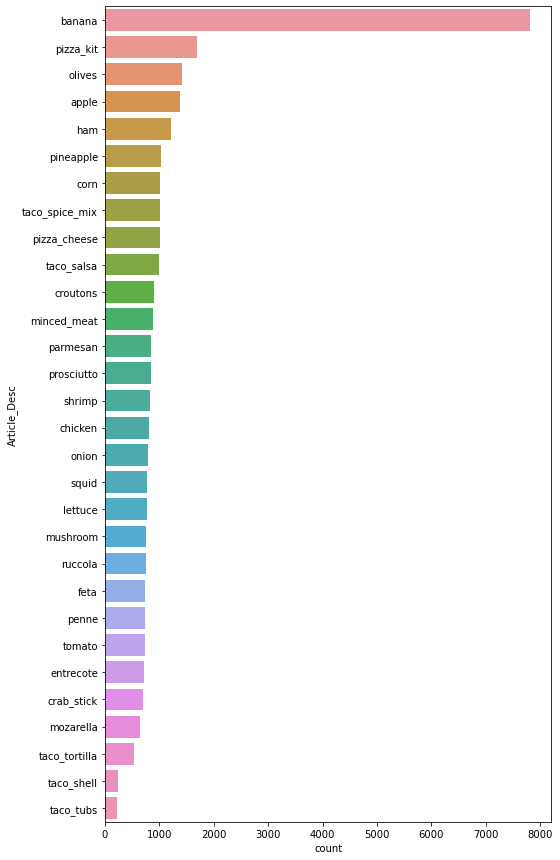

In [90]:
plt.figure(figsize=(8,15))
ax=sns.barplot(data=df_plot2, y="Article_Desc", x="count")
# plt.xticks(rotation=90)
plt.show()

## Association rules

Association rules in retail refer to a data mining technique used to identify relationships between different items or products sold in a retail store. It helps retailers to understand how different products are associated with each other, and how they are likely to be purchased together by customers.

The association rules algorithm works by analyzing customer transaction data, such as sales receipts or online shopping baskets, to identify patterns and associations between items. It does this by examining the frequency of co-occurrence of different products in the same transaction. For example, it might discover that customers who buy bread are also likely to buy butter or that customers who purchase diapers are likely to also buy baby wipes.

### Apriori algorithm

The Apriori algorithm is a popular data mining technique used for mining frequent itemsets and generating association rules. It is a simple and efficient algorithm that is commonly used in retail and e-commerce applications to discover meaningful relationships between different items purchased by customers.

The Apriori algorithm works by scanning through a dataset of transactions and identifying sets of items that occur together frequently. It then uses these frequent itemsets to generate association rules, which represent the relationship between different items or products. The algorithm uses a minimum support threshold to determine which itemsets should be considered frequent.

The Apriori algorithm works in the following way:

- Scan the dataset to identify the support of each item (i.e., the frequency of occurrence of each item).
- Generate frequent itemsets by iteratively increasing the size of the itemset until no more frequent itemsets can be found.
- Generate association rules from the frequent itemsets, using a minimum confidence threshold to determine which rules are meaningful.


The Apriori algorithm generates association rules that are evaluated using several metrics to determine their usefulness and significance. The most commonly used metrics are:

- Support: The support of an itemset is defined as the proportion of transactions in the dataset that contain that itemset. It measures the frequency of occurrence of the itemset in the dataset. Higher support indicates that the itemset is more popular among customers. transactions_where_item(s)_occur / total_transactions.


- Confidence: The confidence of an association rule measures how often the consequent (the itemset that appears on the right-hand side of the rule) appears in transactions that also contain the antecedent (the itemset that appears on the left-hand side of the rule). It is defined as the proportion of transactions containing both the antecedent and the consequent, out of the transactions containing the antecedent. Higher confidence indicates a stronger association between the antecedent and the consequent.


- Lift: The lift of an association rule measures how much the presence of the antecedent increases the likelihood of the consequent, compared to the baseline probability of the consequent. It is defined as the ratio of the observed support of the antecedent and the consequent to the expected support if they were independent. A lift value greater than 1 indicates that the antecedent and consequent appear together more frequently than expected, and thus there is a positive correlation between them. If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets. If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.


- Conviction: The conviction of an association rule measures the degree of implication between the antecedent and the consequent, and it is defined as the ratio of the probability that the antecedent occurs without the consequent to the probability that the antecedent and the consequent occur together. Higher conviction indicates a stronger implication between the antecedent and the consequent.

## Solution

- Task 1: Find complementary products that we can expect a rise to. That is, rules with high confidece and lift>1
- Task 2: Find substitutes to replace taco shells with. That is, find lift <1 with high confidence. Or, find products bought with complemantary products substituting the product in question. 

In [114]:
table = df.pivot_table(index=['Sales_Tran_Seq_Num', 'Member_Account_Seq_Num'],
                    columns="Article_Desc", aggfunc="count",fill_value=0)

In [115]:
table.columns = table.columns.droplevel()

In [116]:
table.reset_index(inplace=True)

In [117]:
table.head()

Article_Desc,Sales_Tran_Seq_Num,Member_Account_Seq_Num,apple,banana,chicken,corn,crab_stick,croutons,entrecote,feta,...,prosciutto,ruccola,shrimp,squid,taco_salsa,taco_shell,taco_spice_mix,taco_tortilla,taco_tubs,tomato
0,0,51,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,36,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,11,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,39,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
table["taco_shell"].sum()

245

In [119]:
table=table[table.columns[2:]]

In [175]:
# min_support set to a low support since higher thresholds filters to many item sets 
frq_items = apriori(table, min_support = 0.02, use_colnames = True)

C:\Users\iye881\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Task 1 - Complementary products to pizza kit
- **Task 1a:** The store plans to run a promotion on pizza cheese and the price reduction is expected to lead to a 300% increase in sales of pizza cheese. To keep up with demand, the store manager has notified the supply chain of the expected increase in sales of pizza cheese. 
- **Task 1b:** Should the store manager also alert the supply chain of a potential increase in demand of any other items?

## Task 1a - Find complementary products with high confidence, lift and conviction

In [176]:
# min_threshold = 0.7 to ensure that generated itemset occur frequently torgehter  
confidence_df = association_rules(frq_items, metric ="confidence", min_threshold = 0.7)

In [177]:
# filter out pizza-kit item-sets with more than one item in it
pizza_kit_rows = confidence_df[confidence_df['antecedents'].apply(lambda x: "pizza_kit" in x)]
pizza_kit_rows = pizza_kit_rows[pizza_kit_rows['consequents'].apply(lambda x: len(x) == 1)]

# filter out banan since its conviction value is comparably low, and that banan occurs in almost every transaction
pizza_kit_rows = pizza_kit_rows[pizza_kit_rows['consequents'].apply(lambda x:  "banana" not in x)]

# Analyze those itemsets with lift larger than 1
pizza_kit_rows.loc[pizza_kit_rows["lift"]>1].sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(parmesan, pizza_kit)",(prosciutto),0.068080,0.091793,0.049284,0.723917,7.886381,0.043035,3.289609
262,"(parmesan, banana, pizza_kit)",(prosciutto),0.051798,0.091793,0.037045,0.715190,7.791313,0.032290,3.188815
185,"(prosciutto, pizza_kit)",(parmesan),0.068954,0.092121,0.049284,0.714739,7.758686,0.042932,3.182620
261,"(prosciutto, banana, pizza_kit)",(parmesan),0.052344,0.092121,0.037045,0.707724,7.682546,0.032223,3.106243
341,"(prosciutto, banana, pizza_kit, olives)",(parmesan),0.032565,0.092121,0.022948,0.704698,7.649693,0.019948,3.074408
329,"(banana, pizza_kit, pineapple, ham)",(pizza_cheese),0.040105,0.109606,0.032237,0.803815,7.333707,0.027841,4.538539
263,"(banana, pizza_cheese, pizza_kit)",(pineapple),0.061086,0.112884,0.049940,0.817531,7.242235,0.043044,4.861744
328,"(banana, pizza_cheese, pizza_kit, ham)",(pineapple),0.039449,0.112884,0.032237,0.817175,7.239075,0.027784,4.852257
187,"(pizza_cheese, pizza_kit)",(pineapple),0.068845,0.112884,0.056169,0.815873,7.227545,0.048397,4.817958
294,"(pizza_cheese, pizza_kit, ham)",(pineapple),0.042728,0.112884,0.034860,0.815857,7.227401,0.030036,4.817534


#### Find the unique products in itemsets occuring with pizza-kit

In [252]:
def get_unqiue_items_from_column(df:pd.DataFrame, column:str="consequents")->list:
    products=[]
    for frozensets in df[column].tolist():
        for product in frozensets:
            products.append(product)
    products = list(set(products))
    return products

complementary_products=get_unqiue_items_from_column(df=pizza_kit_rows)
complementary_products

['prosciutto', 'parmesan', 'pizza_cheese', 'pineapple']

### Conclusion Task 1a
From this analysis we can conclude that:

- 'prosciutto'
- 'parmesan'
- 'pizza_cheese'
- 'pineapple'

Are the complementary products most frequently bought torgehter with pizza kit

## Task 1b - How much should- purchase of these complementary products increase

In [154]:
pizza_kit_rows.groupby("consequents").mean()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(parmesan),0.051288,0.092121,0.036426,0.709054,7.696975,0.031701,3.121090
(prosciutto),0.059939,0.091793,0.043165,0.719553,7.838847,0.037663,3.239212
(pineapple),0.053027,0.112884,0.043301,0.816609,7.234064,0.037315,4.837373
(pizza_cheese),0.055049,0.109606,0.043301,0.789012,7.198656,0.037268,4.230930


### Conclusion Taks 1b

Since the average confidence of the itemsets containing pizza-kit and the four above listed consequents is around 70-80% we can expect an increase of 300%*(0.75) ~ 225 % in these complementary products. Assuming all products scale linearly in volume.

# Task 2 - Substitute products

Taco Shells is one of Axstore’s most popular articles, but unfortunately, the vendor is out of stock and cannot make any more deliveries of that article for the coming weeks. Can the store manager order more of some other article to compensate for the loss of taco shells? That is to say, do we have reason to believe that the sales of taco shells will be transferred to some other articles in the assortment?

The problem with using Apriori for substitute products is that if two products are perfect subsitutes to each other, they rarely occur on the same reciept. Thus, another appproach could be to analyze the complementary products to Taco Shells and descriptively find potential substitutes.   

In [239]:
# Obtain the item-sets
frq_items = apriori(table, min_support = 0.01, use_colnames = True)
lift_df = association_rules(frq_items, metric ="confidence", min_threshold = 0.7)
lift_df = lift_df.sort_values(by= 'lift', ascending =True)
lift_df.head()

C:\Users\iye881\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
195,"(prosciutto, parmesan)",(banana),0.064911,0.853786,0.048629,0.749158,0.877454,-0.006792,0.582892
615,"(prosciutto, parmesan, pizza_kit)",(banana),0.049284,0.853786,0.037045,0.751663,0.880388,-0.005033,0.588771
19,(prosciutto),(banana),0.091793,0.853786,0.069063,0.752381,0.881228,-0.009308,0.590478
837,"(prosciutto, mozarella, pizza_kit, olives)",(banana),0.014206,0.853786,0.010709,0.753846,0.882945,-0.001420,0.593992
579,"(prosciutto, mozarella, olives)",(banana),0.018249,0.853786,0.013769,0.754491,0.883700,-0.001812,0.595553


In [240]:
lift_df.shape

(909, 9)

In [241]:
# filter out taco shells item-sets with more than one item in it
taco_shell_df = lift_df[lift_df['antecedents'].apply(lambda x: "taco_shell" in x)]
taco_shell_df = taco_shell_df[taco_shell_df['consequents'].apply(lambda x: len(x) == 1)]

# # filter out banan since its conviction value is comparably low, and that banan occurs in almost every transaction
taco_shell_df = taco_shell_df[taco_shell_df['consequents'].apply(lambda x:  "banana" not in x)]

In [257]:
# obtain the complementary products to Taco Shells
complementary_products=get_unqiue_items_from_column(df=taco_shell_df)
complementary_products

['taco_spice_mix', 'taco_salsa', 'minced_meat', 'corn']

In [260]:
# iterate over all complementary products to find their unique cosequents

all_complementary_products=[]
def get_taco_shell_complementary_substitute_products(df:pd.DataFrame, product:str)->list:
    df = lift_df[lift_df['consequents'].apply(lambda x: product in x)]
    df = df[df['consequents'].apply(lambda x:  "banana" not in x)]
    df=df.loc[(df["lift"]>1) & (df["conviction"]>1)]
    products=get_unqiue_items_from_column(df=df,column="antecedents")
    all_complementary_products.append(products)
    
for product in complementary_products:
    get_taco_shell_complementary_substitute_products(df=taco_tube_df,product=product)


print(list(set([element for sublist in all_complementary_products for element in sublist])))

['pizza_cheese', 'pineapple', 'taco_spice_mix', 'pizza_kit', 'onion', 'taco_tortilla', 'corn', 'taco_tubs', 'taco_salsa', 'banana', 'ham', 'minced_meat', 'olives', 'taco_shell', 'apple']


### Analyze if selected products are potential substitues
- taco_tortilla
- taco_tubs

In [263]:
# Extract the item sets for taco_tortilla
taco_sub_df = lift_df[lift_df['antecedents'].apply(lambda x: "taco_tortilla" in x)]
taco_sub_df = taco_sub_df[taco_sub_df['consequents'].apply(lambda x: len(x) == 1)]
# # filter out banan since its conviction value is comparably low, and that banan occurs in almost every transaction
taco_sub_df = taco_sub_df[taco_sub_df['consequents'].apply(lambda x:  "banana" not in x)]
complementary_products=get_unqiue_items_from_column(df=taco_sub_df)
complementary_products

['taco_spice_mix', 'taco_salsa', 'minced_meat', 'corn']

In [264]:
# Extract the item sets for taco_tubs
taco_sub_df = lift_df[lift_df['antecedents'].apply(lambda x: "taco_tubs" in x)]
taco_sub_df = taco_sub_df[taco_sub_df['consequents'].apply(lambda x: len(x) == 1)]
# # filter out banan since its conviction value is comparably low, and that banan occurs in almost every transaction
taco_sub_df = taco_sub_df[taco_sub_df['consequents'].apply(lambda x:  "banana" not in x)]
complementary_products=get_unqiue_items_from_column(df=taco_sub_df)
complementary_products

['taco_spice_mix', 'taco_salsa', 'corn']

## Conclusion Task 2

Substitutes for Taco Shells would be: 
- Taco Tortilla
- Taco Tubs

As we can see from their lists of common complemnatary products they are almost thee same as those for Taco Shells: 
- Taco Shells: ['taco_spice_mix', 'taco_salsa', 'minced_meat', 'corn']
- Taco Tortilla: ['taco_spice_mix', 'taco_salsa', 'minced_meat', 'corn']
- Taco Subs: ['taco_spice_mix', 'taco_salsa', 'corn']